# Import packages:

In [1]:
import TESS_Localize as tl
import astropy.units as u
import lightkurve as lk

# Modes of interest and Target Pixel File setup:

In [2]:
low_frequency_list = [9.51112996, 19.02225993, 28.53338989, 38.04451986, 47.55564982, 57.06677979, 66.57790975, 76.08903972]

In [3]:
high_frequency_list = [500.559, 506.057, 642.255, 740.266, 884.017, 889.556, 957.817, 963.28, 969.013, 1028.729, 1034.356, 1107.713, 1212.297, 1217.872, 1223.429]

In [4]:
search_result = lk.search_targetpixelfile('TIC117070953')
tpf = search_result.download(quality_bitmask='default')

C:\Users\higgi\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


# Using TESS_Localize:

* Used in this example to show that two set of signals found in the pipeline aperture can be attributed to entirely different sources

## Examine PCA:

In [5]:
low_pca = tl.PCA(targetpixelfile=tpf, frequencies=low_frequency_list, frequnit=u.uHz, principal_components = 5)

C:\Users\higgi\anaconda3\lib\site-packages\astropy\units\quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [6]:
high_pca = tl.PCA(targetpixelfile=tpf, frequencies=high_frequency_list, frequnit=u.uHz, principal_components = 5)

C:\Users\higgi\anaconda3\lib\site-packages\astropy\units\quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\higgi\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


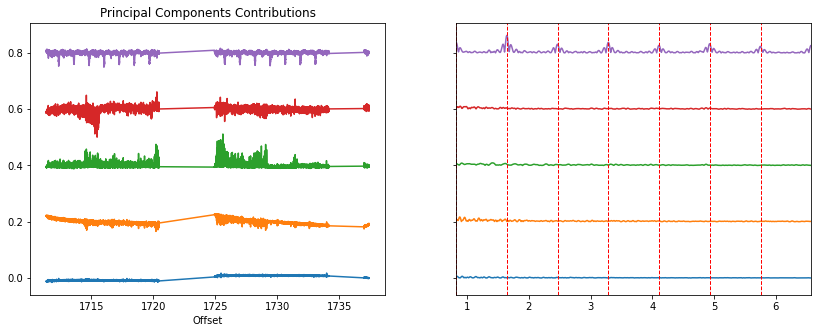

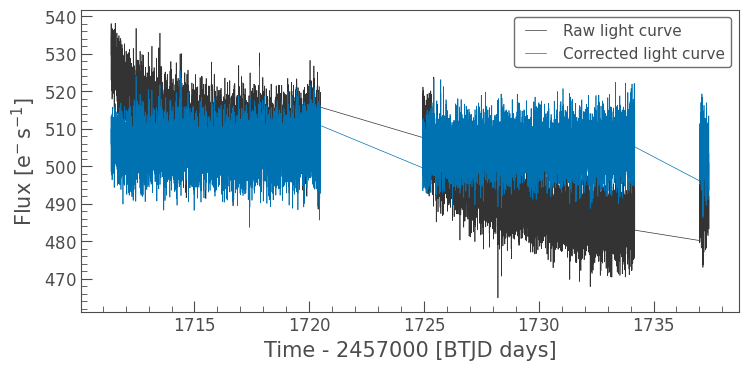

In [7]:
low_pca.plot_pca()

C:\Users\higgi\anaconda3\lib\site-packages\astropy\units\quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


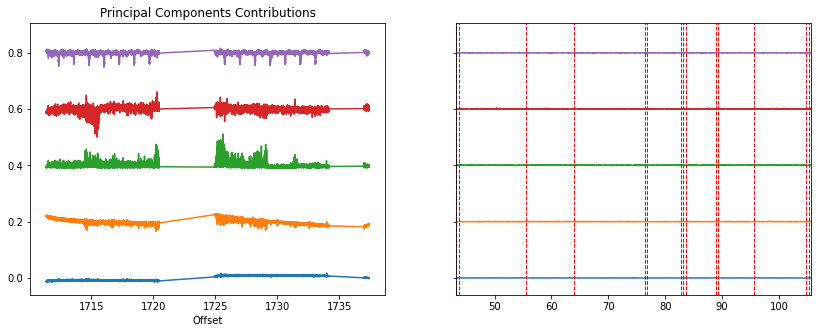

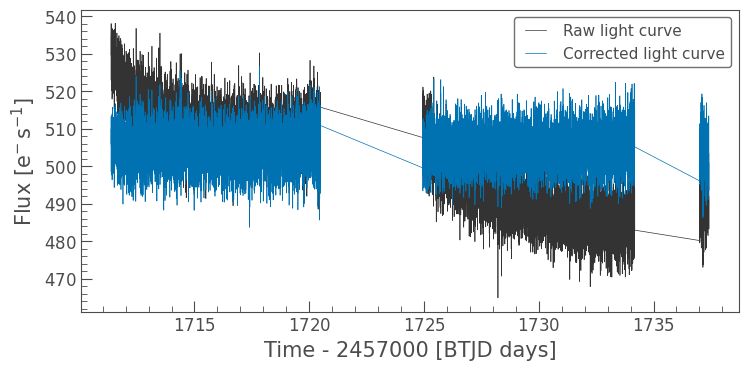

In [8]:
high_pca.plot_pca()

### From these plots we can see power at our frequencies is being removed when the number of principal components are greater than 4.

* If you are unsure of how many principal components to remove in the localization, you can use .autopca. This will provide an estimate in an attempt to ensure no signal of interest is removed in the PCA.

In [9]:
low_pca.autopca

0

In [10]:
high_pca.autopca

5

## Localizing the signal

In [11]:
low = tl.Localize(targetpixelfile=tpf, frequencies=low_frequency_list, frequnit=u.uHz, principal_components = 0)

In [12]:
high = tl.Localize(targetpixelfile=tpf, frequencies=high_frequency_list, frequnit=u.uHz, principal_components = 'auto')

C:\Users\higgi\anaconda3\lib\site-packages\astropy\units\quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\higgi\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


     index          ra        dec               source          x          y  \
0       89  319.294964  34.196133  1855294415817908480   5.876951   2.998218   
1       92  319.295630  34.196130  1855294415817907840   5.961744   2.957995   
2       75  319.292226  34.192087  1855294312738692480   5.237045   2.537803   
3       98  319.291908  34.201217  1855294415817910144   5.852838   3.964698   
4       86  319.289577  34.200021  1855294312738695296   5.469589   3.919459   
..     ...         ...        ...                  ...        ...        ...   
219     91  319.318528  34.214513  1855294381458168448  10.202716   4.425977   
220     99  319.338806  34.208630  1855294553256855040  12.365883   2.308811   
221    100  319.341717  34.211391  1855294553256854912  12.935389   2.560970   
222    101  319.356889  34.205450  1855294514594056192  14.443706   0.739674   
223    223  319.241740  34.258541  1867305137241296768   3.582052  15.799980   

        Gmag    distance    likelihood 

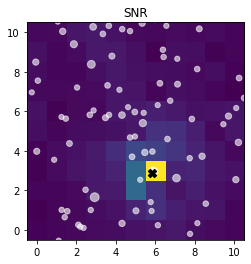

In [13]:
low.info()

     index          ra        dec               source         x          y  \
0      164  319.284473  34.207672  1855295171732158080  5.368918   5.404240   
1      166  319.283189  34.210540  1855295171732158592  5.411410   5.923105   
2       85  319.283935  34.203068  1855294312738698112  4.969312   4.726386   
3      135  319.280163  34.209637  1855295068652944128  4.960772   5.964523   
4       84  319.282486  34.202179  1855294312738698368  4.720665   4.675848   
..     ...         ...        ...                  ...       ...        ...   
219     77  319.279850  34.171883  1855294209659475328  2.205911   0.161667   
220     80  319.278908  34.172149  1855294209659475584  2.104918   0.259083   
221     82  319.281108  34.171989  1855294205359143808  2.373989   0.102886   
222     87  319.311307  34.220357  1855294450177649024  9.702034   5.758189   
223    223  319.241740  34.258541  1867305137241296768  3.582052  15.799980   

        Gmag    distance    likelihood  
0    13.04

c:\users\higgi\tess_localize\TESS_Localize\TESS_Localize.py:743: UserWarning: Frequencies used may not all belong to the same source and provided fit could be unreliable
  warnings.warn('Frequencies used may not all belong to the same source and provided fit could be unreliable')


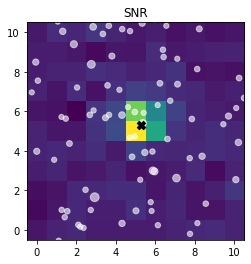

In [14]:
high.info()

## SNR plots for the frequencies with the greatest signal

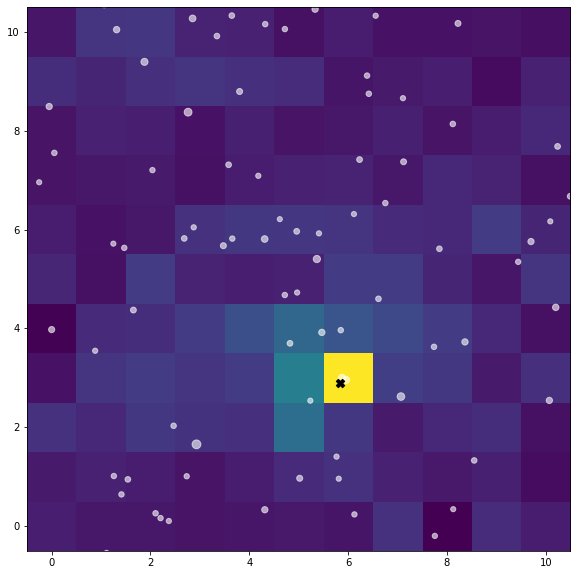

In [15]:
low.plot(frequencylist_index=2,method='snr')

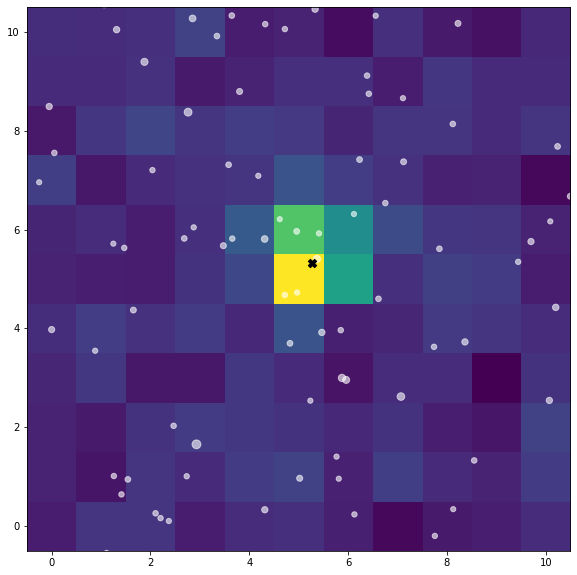

In [16]:
high.plot(frequencylist_index=4,method='snr')